# Model comparison

This notebook is to compare the performance of the different models.

In [1]:
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
errors = []

Linear regression. Feature = Percentage of listings with price cut. Seasonally adjusted data and non-seasonally adjusted data.

In [3]:
df = pd.read_csv('linear_regression/errors.csv', \
    index_col=0).reset_index().drop(columns=['index'])
df = df.iloc[16:18]
df['model'] = ['Linear regression (SA)', 'Linear regression (NSA)']
df.drop(columns=['feature', 'lag'], inplace=True)

In [4]:
errors.append(df)

Ensemble model (bagging with linear regression). Seasonally adjusted data.

In [5]:
df = pd.read_csv('ensemble_LR/errors_sa.csv', \
    index_col=0).reset_index().drop(columns=['index'])
df = df.iloc[[9]]
df['model'] = ['Ensemble model (SA)']
df.drop(columns=['n_estimators', 'max_samples'], inplace=True)

In [6]:
errors.append(df)

Ensemble model (bagging with linear regression). Non-seasonally adjusted data.

In [7]:
df = pd.read_csv('ensemble_LR/errors_nsa.csv', \
    index_col=0).reset_index().drop(columns=['index'])
df = df.iloc[[17]]
df['model'] = ['Ensemble model (NSA)']
df.drop(columns=['n_estimators', 'max_samples'], inplace=True)

In [8]:
errors.append(df)

Random forest. Seasonally adjusted data.

In [9]:
df = pd.read_csv('random_forest/errors_sa.csv', \
    index_col=0).reset_index().drop(columns=['index'])
df = df.iloc[[2]]
df['model'] = ['Random forest (SA)']
df.drop(columns=['n_estimators', 'max_samples'], inplace=True)

In [10]:
errors.append(df)

Random forest. Non-seasonally adjusted data.

In [11]:
df = pd.read_csv('random_forest/errors_nsa.csv', \
    index_col=0).reset_index().drop(columns=['index'])
df = df.iloc[[3]]
df['model'] = ['Random forest (NSA)']
df.drop(columns=['n_estimators', 'max_samples'], inplace=True)

In [12]:
errors.append(df)

Join errors together and plot.

In [13]:
errors = pd.concat(errors).reset_index().drop(columns='index')

In [14]:
errors

,MSE,RMSE,MAE,MAPE,R2,model
0,0.000010,0.003236,0.002510,0.381913,0.900160,Linear regression (SA)
1,0.000022,0.004741,0.003848,0.796023,0.785715,Linear regression (NSA)
2,0.000019,0.004369,0.003468,0.653733,0.818010,Ensemble model (SA)
3,0.000032,0.005623,0.004943,1.759244,0.698587,Ensemble model (NSA)
4,0.000020,0.004454,0.003662,0.667307,0.810903,Random forest (SA)
5,0.000043,0.006532,0.005663,1.962810,0.593182,Random forest (NSA)


/opt/anaconda3/envs/ntpp/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/opt/anaconda3/envs/ntpp/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/anaconda3/envs/ntpp/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/anaconda3/envs/ntpp/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator


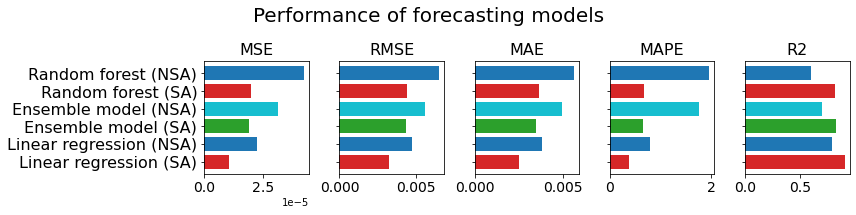

In [15]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(12, 3))
fig.suptitle('Performance of forecasting models', fontsize=20)

bar_labels = ['red', 'blue', 'green', 'cyan']
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:cyan']

ax1.barh(errors['model'], errors['MSE'], label=bar_labels, color=bar_colors)
ax1.set_title('MSE', fontsize=16)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=16)

ax2.barh(errors['model'], errors['RMSE'], color=bar_colors)
ax2.set_title('RMSE', fontsize=16)
ax2.set_yticklabels(['', '', '', ''])
ax2.tick_params(axis='x', labelsize=14)

ax3.barh(errors['model'], errors['MAE'], color=bar_colors)
ax3.set_title('MAE', fontsize=16)
ax3.set_yticklabels(['', '', '', ''])
ax3.tick_params(axis='x', labelsize=14)

ax4.barh(errors['model'], errors['MAPE'], color=bar_colors)
ax4.set_title('MAPE', fontsize=16)
ax4.set_yticklabels(['', '', '', ''])
ax4.tick_params(axis='x', labelsize=14)

ax5.barh(errors['model'], errors['R2'], color=bar_colors)
ax5.set_title('R2', fontsize=16)
ax5.set_yticklabels(['', '', '', ''])
ax5.tick_params(axis='x', labelsize=14)

plt.tight_layout()
plt.savefig('figures/comparisons.eps', format='eps')
plt.show()